In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib inline

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)
plt.rcParams.update({'font.size': 22})

Loading data files

In [2]:
# year_to_data_file_dict = {18: 'H-1B_Disclosure_Data_FY2018-Q3.xlsx',
#                          17: 'H-1B_Disclosure_Data_FY17.xlsx'}

In [3]:
df_2018 = pd.read_excel('./data/H-1B_Disclosure_Data_FY2018-Q3.xlsx')

In [4]:
df_2017 = pd.read_excel('./data/H-1B_Disclosure_Data_FY17.xlsx')

### Possible Questions to address

Which company issues the most H1B / H1B1, to which Job title?

Which company has the highest salary?

Which caompanies are in New York / Boston?

How long does it take for H1B / H1B1 processing?

Is there any prediction about Case Status?

Difference in salary between cities / companies

Which job title has highest salary

How many of them are old vs new employment?

Distribution of prevailing wage

### Initial data exploration

Now that data is loaded, let's see the brief structure of the data with .head().

In [5]:
df_2018.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_ADDRESS,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,EMPLOYER_COUNTRY,EMPLOYER_PROVINCE,EMPLOYER_PHONE,EMPLOYER_PHONE_EXT,AGENT_REPRESENTING_EMPLOYER,AGENT_ATTORNEY_NAME,AGENT_ATTORNEY_CITY,AGENT_ATTORNEY_STATE,JOB_TITLE,SOC_CODE,SOC_NAME,NAICS_CODE,TOTAL_WORKERS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMP,CHANGE_EMPLOYER,AMENDED_PETITION,FULL_TIME_POSITION,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_WAGE_LEVEL,PW_SOURCE,PW_SOURCE_YEAR,PW_SOURCE_OTHER,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,PUBLIC_DISCLOSURE_LOCATION,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,ORIGINAL_CERT_DATE
0,I-200-15279-248712,CERTIFIED-WITHDRAWN,2015-10-06,2017-10-01,H-1B,2015-11-15,2017-11-14,MASSACHUSETTS INSTITUTE OF TECHNOLOGY,NaN,77 MASSACHUSETTS AVENUE,CAMBRIDGE,MA,02139,UNITED STATES OF AMERICA,NaN,6172532851,NaN,N,",",NaN,NaN,POSTDOCTORAL ASSOCIATE,15-2041,STATISTICIANS,6113.0,1,1,0,0,0,0,0,Y,58032.0,Year,Level I,OES,2015.0,NaN,58032.0,0.0,Year,N,N,NaN,Y,NaN,CAMBRIDGE,MIDDLESEX,MA,02139,2015-10-13
1,I-200-16134-779506,CERTIFIED-WITHDRAWN,2016-05-13,2017-10-01,H-1B,2016-09-01,2019-08-31,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),NaN,77 MASSACHUSETTS AVENUE,CAMBRIDGE,MA,02139,UNITED STATES OF AMERICA,NaN,6172532851,NaN,N,",",NaN,NaN,ASSISTANT PROFESSOR,25-1031,"ARCHITECTURE TEACHERS, POSTSECONDARY",6113.0,1,0,1,0,0,0,0,Y,60967.0,Year,Level II,OES,2016.0,OFLC ONLINE DATA CENTER,95600.0,0.0,Year,N,N,NaN,NaN,NaN,CAMBRIDGE,MIDDLESEX COUNTY,MA,02139,2016-05-19
2,I-200-16309-239165,CERTIFIED-WITHDRAWN,2016-11-04,2017-10-01,H-1B,2016-12-01,2017-11-30,MASSACHUSETTS INSTITUTE OF TECHNOLOGY,NaN,77 MASSACHUSETTS AVENUE,CAMBRIDGE,MA,02139,UNITED STATES OF AMERICA,NaN,6172532851,NaN,N,",",NaN,NaN,POSTDOCTORAL ASSOCIATE,19-2012,PHYSICISTS,6113.0,1,0,1,0,0,0,0,Y,50398.0,Year,Level I,OES,2016.0,OFLC ONLINE DATA CENTER,60400.0,0.0,Year,N,N,NaN,Y,NaN,CAMBRIDGE,MIDDLESEX,MA,02139,2016-11-10
3,I-200-16363-692687,CERTIFIED-WITHDRAWN,2016-12-28,2017-10-01,H-1B,2017-02-01,2018-01-31,MASSACHUSETTS INSTITUTE OF TECHNOLOGY,NaN,77 MASSACHUSETTS AVENUE,CAMBRIDGE,MA,02139,UNITED STATES OF AMERICA,NaN,6172532851,NaN,N,",",NaN,NaN,RESEARCH SCIENTIST,19-2042,"GEOSCIENTISTS, EXCEPT HYDROLOGISTS AND GEOGRAP...",6113.0,1,1,0,0,0,0,0,Y,61069.0,Year,Level II,OES,2016.0,OFLC ONLINE DATA CENTER,65000.0,0.0,Year,N,N,NaN,Y,NaN,CAMBRIDGE,MIDDLESEX,MA,02139,2017-01-04
4,I-200-17055-511599,CERTIFIED-WITHDRAWN,2017-02-24,2017-10-01,H-1B,2017-06-01,2018-05-31,MASSACHUSETTS INSTITUTE OF TECHNOLOGY,NaN,77 MASSACHUSETTS AVENUE,CAMBRIDGE,MA,02139,UNITED STATES OF AMERICA,NaN,6172532851,NaN,N,",",NaN,NaN,POSTDOCTORAL ASSOCIATE,17-2131,MATERIALS ENGINEERS,6113.0,1,0,1,0,0,0,0,Y,41392.0,Year,Level I,OES,2016.0,OFLC ONLINE DATA CENTER,49383.0,0.0,Year,N,N,NaN,Y,NaN,CAMBRIDGE,MIDDLESEX,MA,02139,2017-03-02


In [6]:
df_2018['SOC_NAME'].value_counts()[:10]

SOFTWARE DEVELOPERS, APPLICATIONS        157553
COMPUTER SYSTEMS ANALYSTS                 52958
COMPUTER OCCUPATIONS, ALL OTHER           50846
COMPUTER PROGRAMMERS                      22827
SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE     21892
OPERATIONS RESEARCH ANALYSTS              11343
MANAGEMENT ANALYSTS                       10979
ACCOUNTANTS AND AUDITORS                   9584
MECHANICAL ENGINEERS                       9433
FINANCIAL ANALYSTS                         8880
Name: SOC_NAME, dtype: int64

In [7]:
df_2018['JOB_TITLE'].value_counts()[:10]

SOFTWARE DEVELOPER             30063
SOFTWARE ENGINEER              26599
PROGRAMMER ANALYST             12664
SENIOR SOFTWARE ENGINEER        6516
DEVELOPER                       5375
SYSTEMS ANALYST                 5336
CONSULTANT                      5332
SENIOR SYSTEMS ANALYST JC60     4921
ANALYST                         4550
BUSINESS ANALYST                4450
Name: JOB_TITLE, dtype: int64

In [8]:
df_2018[df_2018['TOTAL_WORKERS']>199]

# https://lcr-pjr.doleta.gov/index.cfm?event=ehLCJRExternal.dspCert&doc_id=3&visa_class_id=1&id=5721691

# df_2018[df_2018['PREVAILING_WAGE']>300*1000]

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_ADDRESS,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,EMPLOYER_COUNTRY,EMPLOYER_PROVINCE,EMPLOYER_PHONE,EMPLOYER_PHONE_EXT,AGENT_REPRESENTING_EMPLOYER,AGENT_ATTORNEY_NAME,AGENT_ATTORNEY_CITY,AGENT_ATTORNEY_STATE,JOB_TITLE,SOC_CODE,SOC_NAME,NAICS_CODE,TOTAL_WORKERS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMP,CHANGE_EMPLOYER,AMENDED_PETITION,FULL_TIME_POSITION,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_WAGE_LEVEL,PW_SOURCE,PW_SOURCE_YEAR,PW_SOURCE_OTHER,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,PUBLIC_DISCLOSURE_LOCATION,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,ORIGINAL_CERT_DATE
71375,I-200-17339-665265,CERTIFIED,2017-12-05,2017-12-11,H-1B,2018-06-05,2021-06-04,"QUALCOMM TECHNOLOGIES, INC.",NaN,5775 MOREHOUSE DRIVE,SAN DIEGO,CA,92121,UNITED STATES OF AMERICA,NaN,8588453309,NaN,Y,"FAURE WENGER, KARINE",SAN DIEGO,CA,SOFTWARE ENGINEER,15-1133,"SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE",334220.0,200,200,0,0,0,0,0,Y,99154.0,Year,Level II,OES,2017.0,OFLC ONLINE DATA CENTER,99154.0,126500.0,Year,Y,N,Y,NaN,NaN,SAN DIEGO,SAN DIEGO,CA,92121,NaT
71987,I-200-17339-363113,CERTIFIED,2017-12-05,2017-12-11,H-1B,2018-06-05,2021-06-04,"QUALCOMM TECHNOLOGIES, INC.",NaN,5775 MOREHOUSE DRIVE,SAN DIEGO,CA,92121,UNITED STATES OF AMERICA,NaN,8588453309,NaN,Y,"FAURE WENGER, KARINE",SAN DIEGO,CA,HARDWARE ENGINEER,17-2072,"ELECTRONICS ENGINEERS, EXCEPT COMPUTER",334220.0,200,200,0,0,0,0,0,Y,97302.0,Year,Level II,OES,2017.0,OFLC ONLINE DATA CENTER,97302.0,123200.0,Year,Y,N,Y,NaN,NaN,SAN DIEGO,SAN DIEGO,CA,92121,NaT
76325,I-200-17341-621538,CERTIFIED,2017-12-08,2017-12-14,H-1B,2018-06-06,2021-06-05,"QUALCOMM ATHEROS, INC.",NaN,1700 TECHNOLOGY DRIVE,SAN JOSE,CA,95110,UNITED STATES OF AMERICA,NaN,8588453309,NaN,Y,"FAURE WENGER, KARINE",SAN DIEGO,CA,SOFTWARE ENGINEER,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",334413.0,200,200,0,0,0,0,0,Y,85925.0,Year,Level II,OES,2017.0,OFLC ONLINE DATA CENTER,85925.0,121600.0,Year,Y,N,Y,NaN,NaN,SAN DIEGO,SAN DIEGO,CA,92121,NaT
76327,I-200-17341-918320,CERTIFIED,2017-12-08,2017-12-14,H-1B,2018-06-06,2021-06-05,"QUALCOMM ATHEROS, INC.",NaN,1700 TECHNOLOGY DRIVE,SAN JOSE,CA,95110,UNITED STATES OF AMERICA,NaN,8588453309,NaN,Y,"FAURE WENGER, KARINE",SAN DIEGO,CA,HARDWARE ENGINEER,17-2072,"ELECTRONICS ENGINEERS, EXCEPT COMPUTER",334413.0,200,200,0,0,0,0,0,Y,96970.0,Year,Level II,OES,2017.0,OFLC ONLINE DATA CENTER,97302.0,122900.0,Year,Y,N,Y,NaN,NaN,SAN DIEGO,SAN DIEGO,CA,92121,NaT


Looking through the data, we discovered several things:

1. This dataset includes cases that are certified, certified-withdrawn, withdrawn and denied, as shown in the column 'CASE_STATUS'. A natural question to ask, how many cases are certified / denied?

2. Each row corresponds to a case. There can be multiple workers in a case, as described in the column 'TOTAL_WORKERS'.

How many cases are certified, certified-withdrawn, withdrawn and denied? <br>

In [9]:
# Helper function to plot horizontal bar charts

def plot_horizontal_bar_char(plot_data, font_scale, xlabel=None, ylabel=None, hor_shift=0, vert_shift=-0.1):
    sns.set(font_scale=font_scale)
    ax = plot_data.plot.barh()
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(xlabel)
    # Write the number on top of t he bar
    for i, v in enumerate(plot_data):
        ax.text(v + hor_shift, i+vert_shift, str(v), color='blue', fontweight='bold')

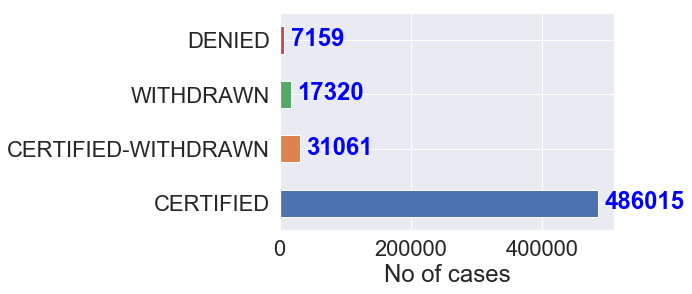

In [10]:
plot_horizontal_bar_char(df_2018['CASE_STATUS'].value_counts(), 2, 'No of cases', hor_shift=10**4)

What is the percentage of cases for each case status?

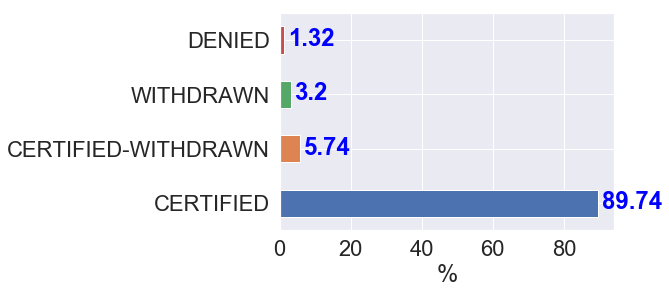

In [11]:
plot_horizontal_bar_char((df_2018['CASE_STATUS'].value_counts() / len(df_2018) * 100).round(2), 2, '%', hor_shift=1)

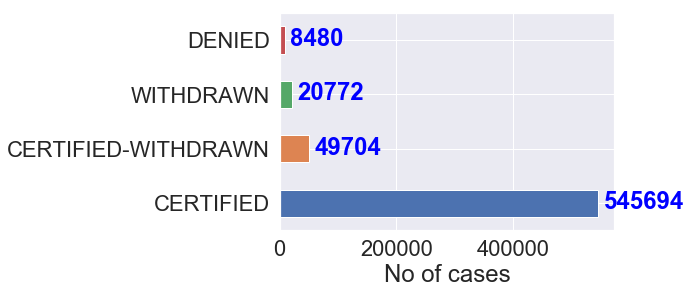

In [12]:
plot_horizontal_bar_char(df_2017['CASE_STATUS'].value_counts(), 2, 'No of cases', hor_shift=10**4)

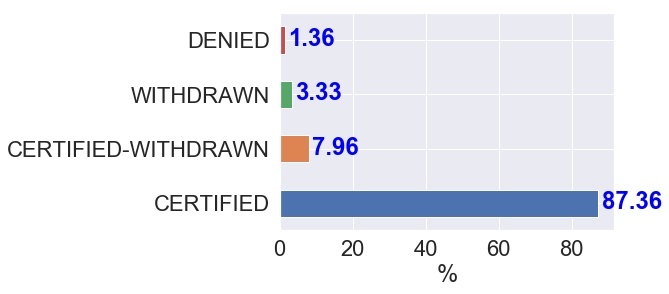

In [13]:
plot_horizontal_bar_char((df_2017['CASE_STATUS'].value_counts() / len(df_2017) * 100).round(2), 2, '%', hor_shift=1)

Ans: ~ 90% of the cases are certified. Interestingly, only 1.3% of the cases were denied. Cases that were withdrawn 
are more common than those denied.

This looks suspicious: The annual cap for H1B + H1B1 visa should be 65000. The number of certified cases is much more than that! Is it because of the other visa classes in this data? Is it because of the time range in this data spanning more than one year? Is it because of the exemption of H-1B cap for universities / non-profit organization staff? Let's make sense out of it!

In [14]:
# Let's just look at the certified cases for now

df_2018_certified = df_2018[df_2018['CASE_STATUS']=='CERTIFIED'].copy()
df_2017_certified = df_2017[df_2017['CASE_STATUS']=='CERTIFIED'].copy()

There are three types of visas in this data, what are their respective number of cases?

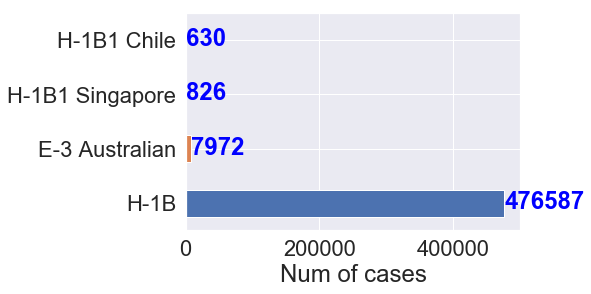

In [15]:
plot_horizontal_bar_char(df_2018_certified['VISA_CLASS'].value_counts(), 2, 'Num of cases', hor_shift=1)

What about the number of certified applicants for each visa type?

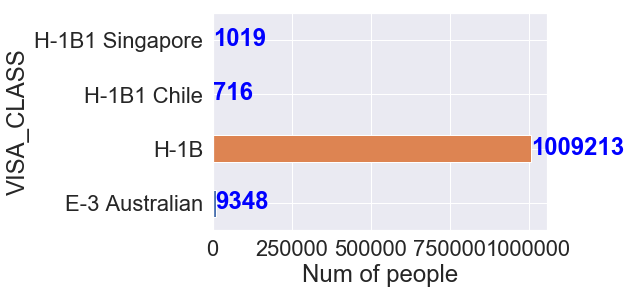

In [16]:
plot_horizontal_bar_char(df_2018_certified.groupby(by=['VISA_CLASS'])['TOTAL_WORKERS'].sum(),
                         2, 'Num of people', hor_shift=1)

# This number is too high - https://travel.state.gov/content/travel/en/legal/visa-law0/visa-statistics/nonimmigrant-visa-statistics.html

Let's aggregate the visas into their own types.

In [17]:
df_2018_certified['VISA_CLASS_AGG'] = df_2018_certified['VISA_CLASS'].str.split(' ').map(lambda x:x[0])
df_2017_certified['VISA_CLASS_AGG'] = df_2017_certified['VISA_CLASS'].str.split(' ').map(lambda x:x[0])

As there are huge differences between the three types of visas in terms of quota, plotting their time-binned histograms for the case dates may reveal some insights.

In [18]:
def construct_time_based_histogram(df, visa_type, date_to_show, axis):
    df = df[df['VISA_CLASS_AGG'] == visa_type]
    df.groupby([df[date_to_show].dt.year.rename('year'), 
                df[date_to_show].dt.month.rename('month')])['TOTAL_WORKERS'].sum().plot(kind="bar",
                                                                                        ax=axis,
                                                                                        title='{}_{}'.format(visa_type, date_to_show),
                                                                                        legend=False,
                                                                                        fontsize=30)

Let's plot the three dates for the three visa types

**************************************************** DECISION_DATE *****************************************************


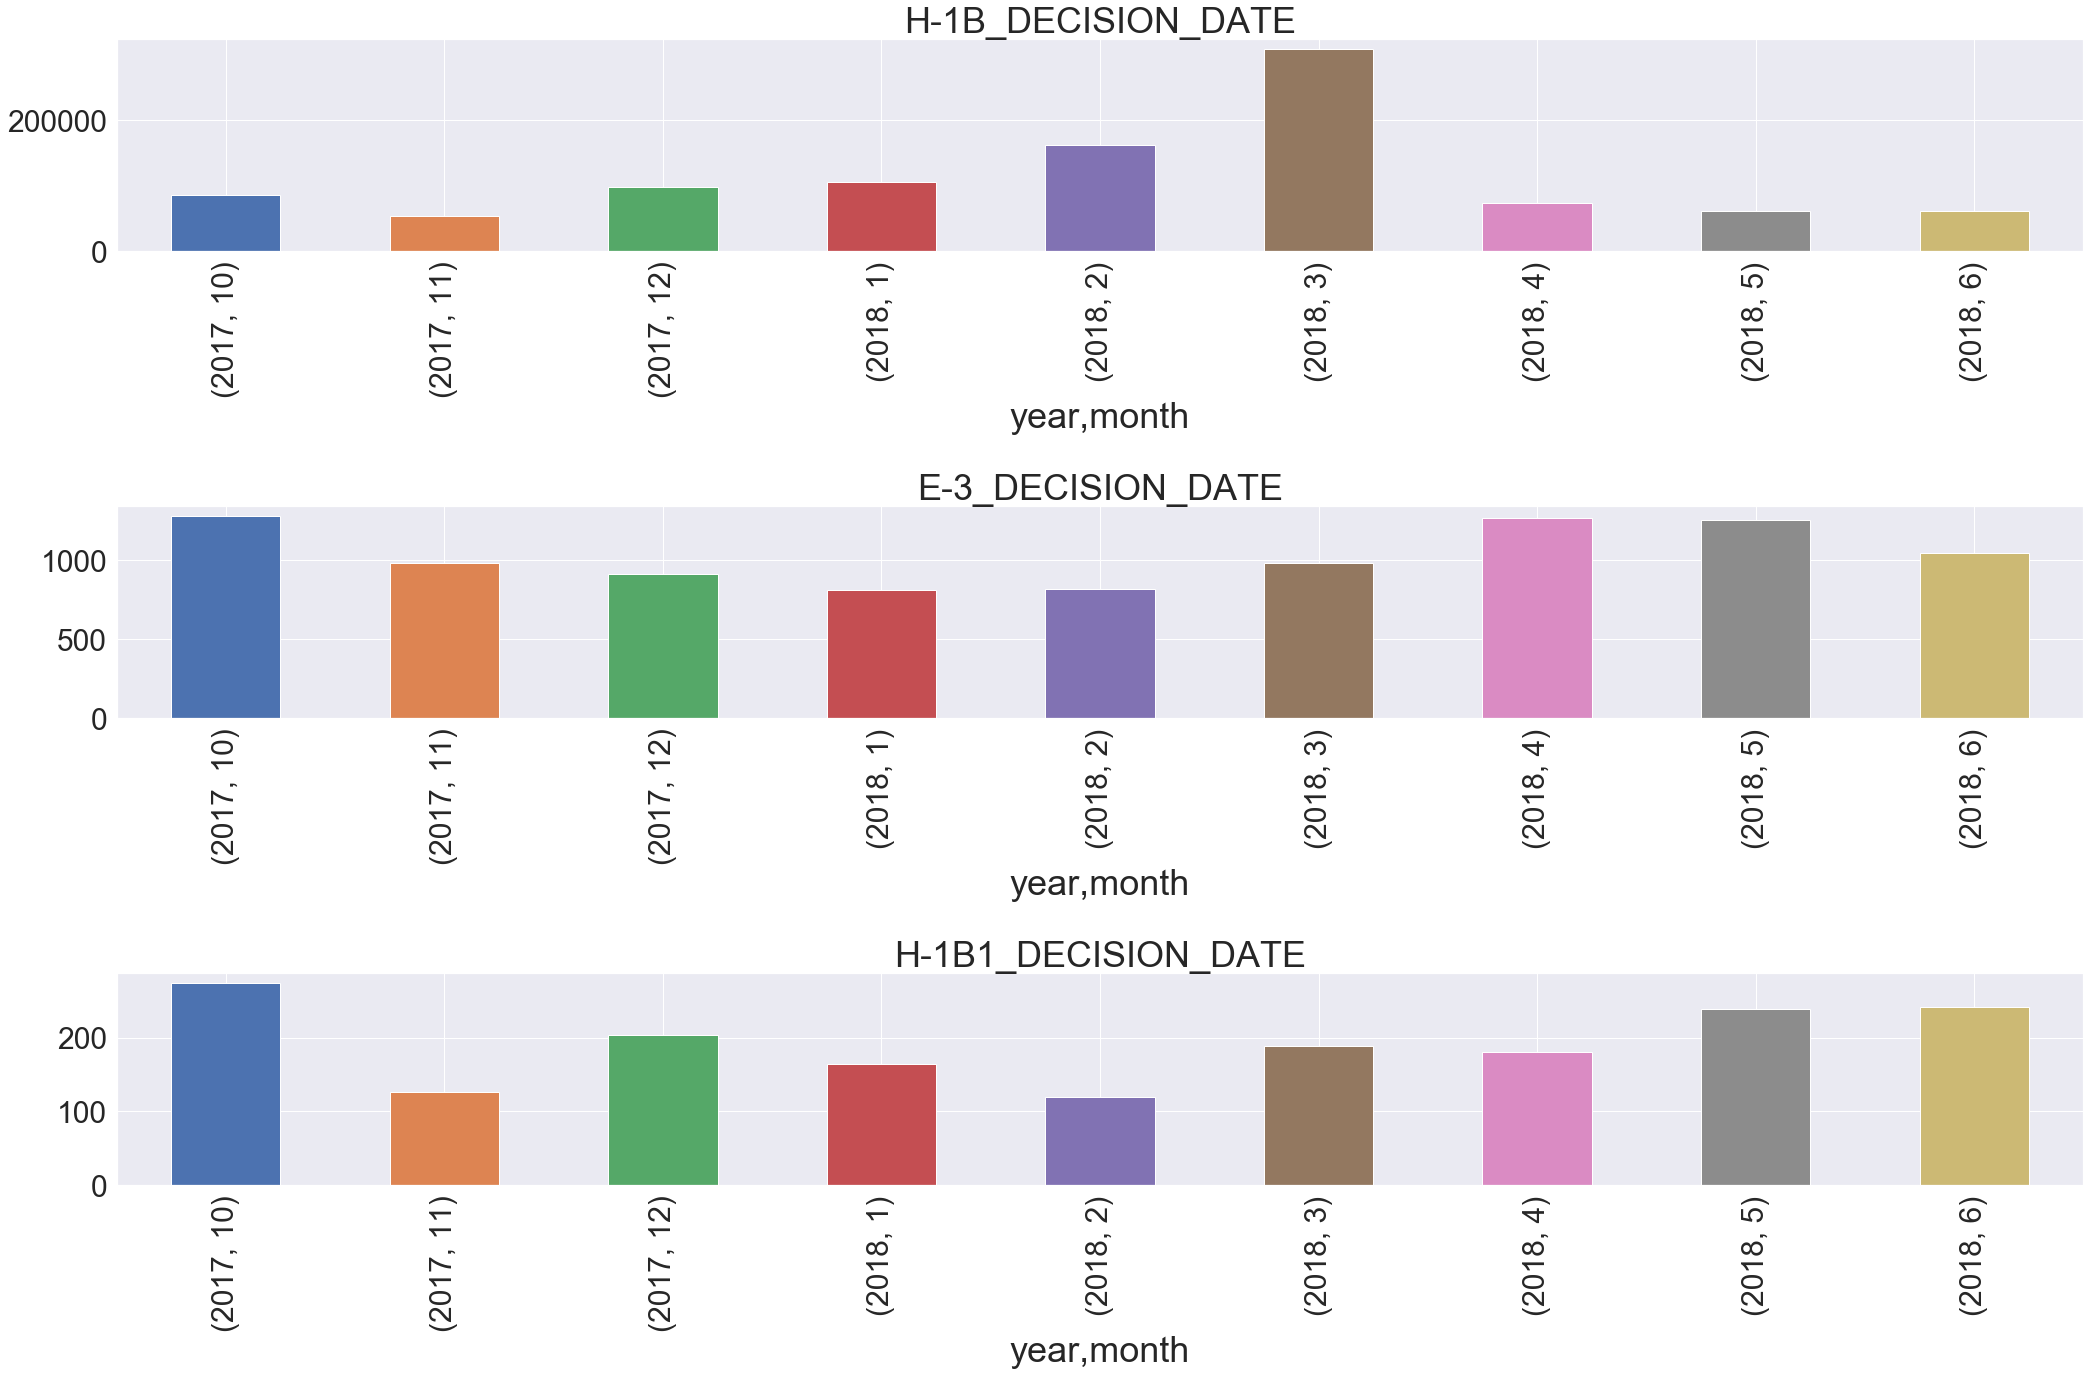

**************************************************** CASE_SUBMITTED ****************************************************


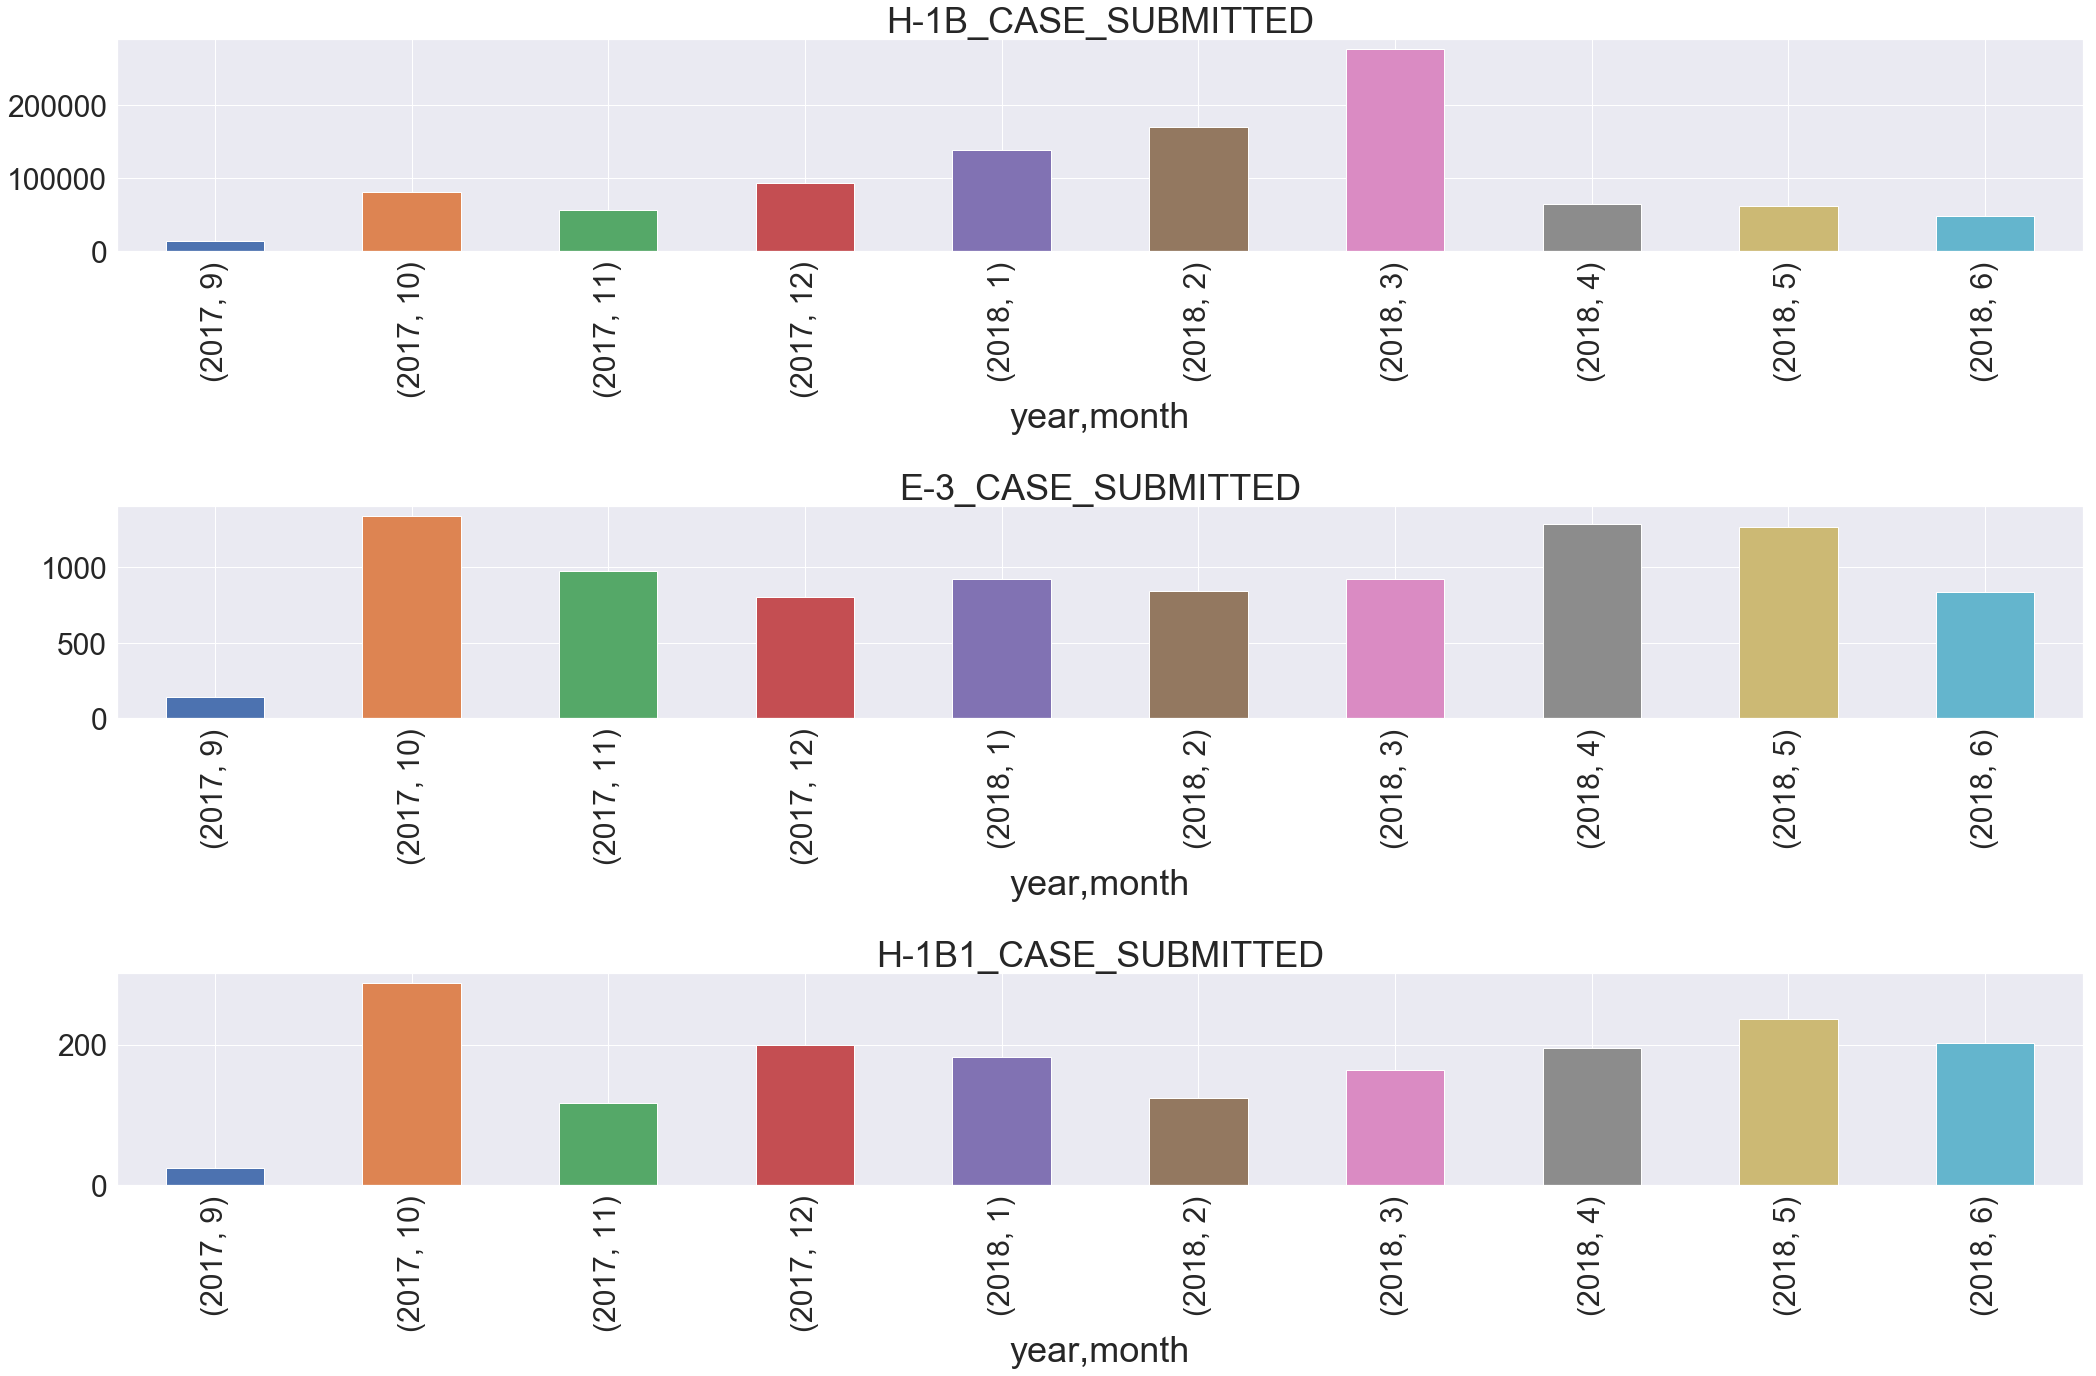

************************************************ EMPLOYMENT_START_DATE *************************************************


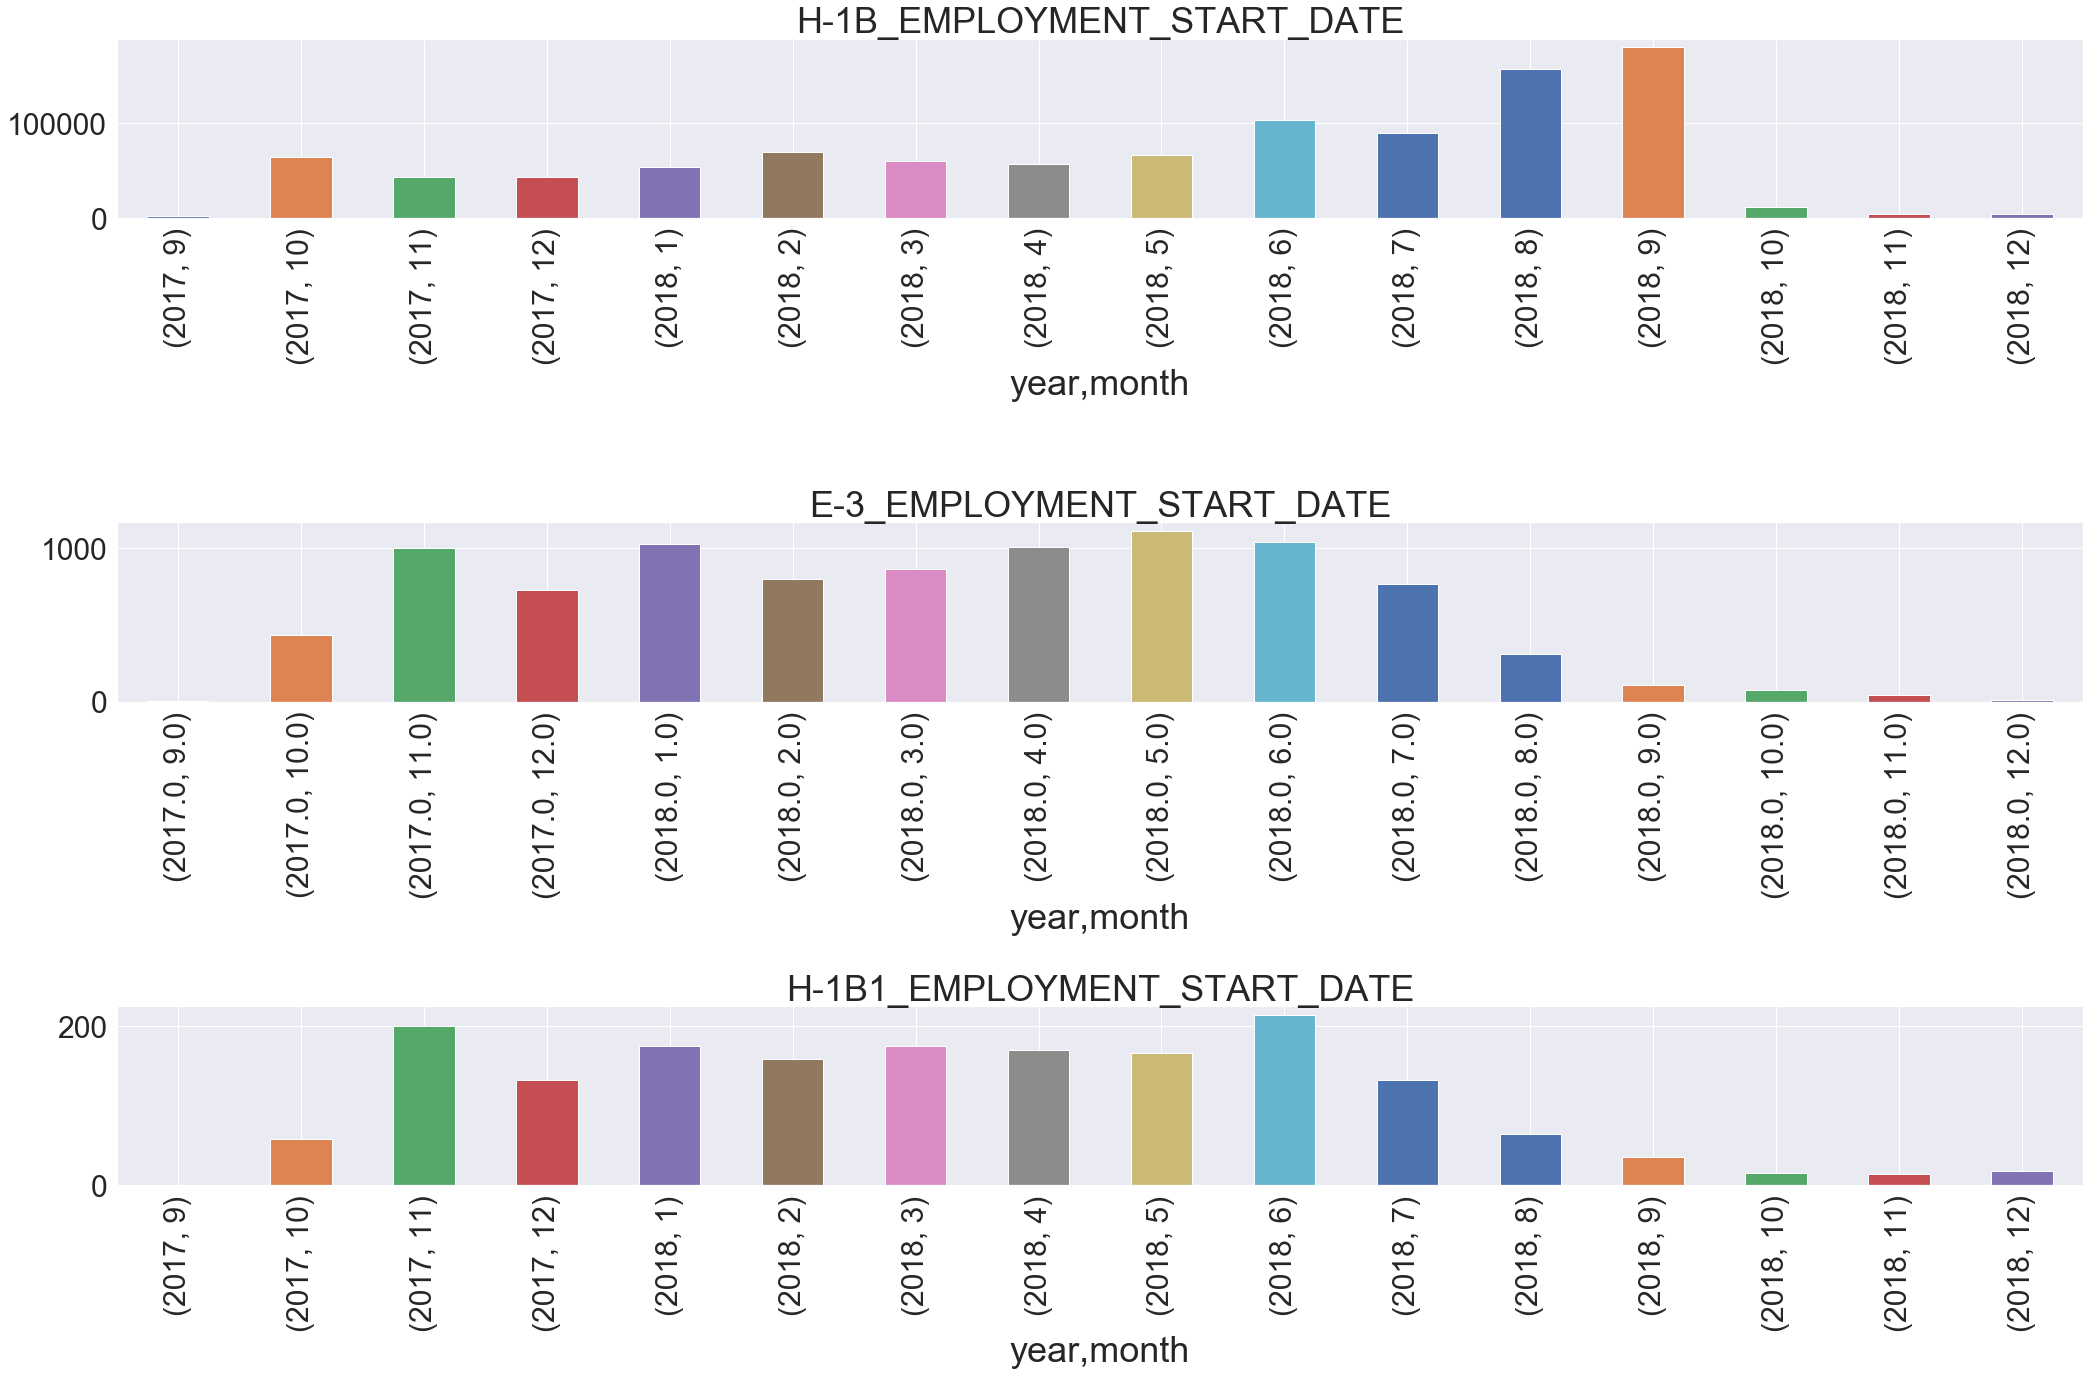

In [19]:
sns.set(font_scale=3)

date_to_show_list = ['DECISION_DATE', 'CASE_SUBMITTED', 'EMPLOYMENT_START_DATE']

visa_type_list = ['H-1B', 'E-3', 'H-1B1']
for date_index, date_to_show in enumerate(date_to_show_list):
    print(' {} '.format(date_to_show).center(120,'*'))
    fig, axes = plt.subplots(3, 1, figsize=(30,20))
    for visa_type_index, visa_type in enumerate(visa_type_list):
        construct_time_based_histogram(df_2018_certified, visa_type, date_to_show, axis=axes[visa_type_index])
    plt.tight_layout()
    plt.show()

**************************************************** DECISION_DATE *****************************************************


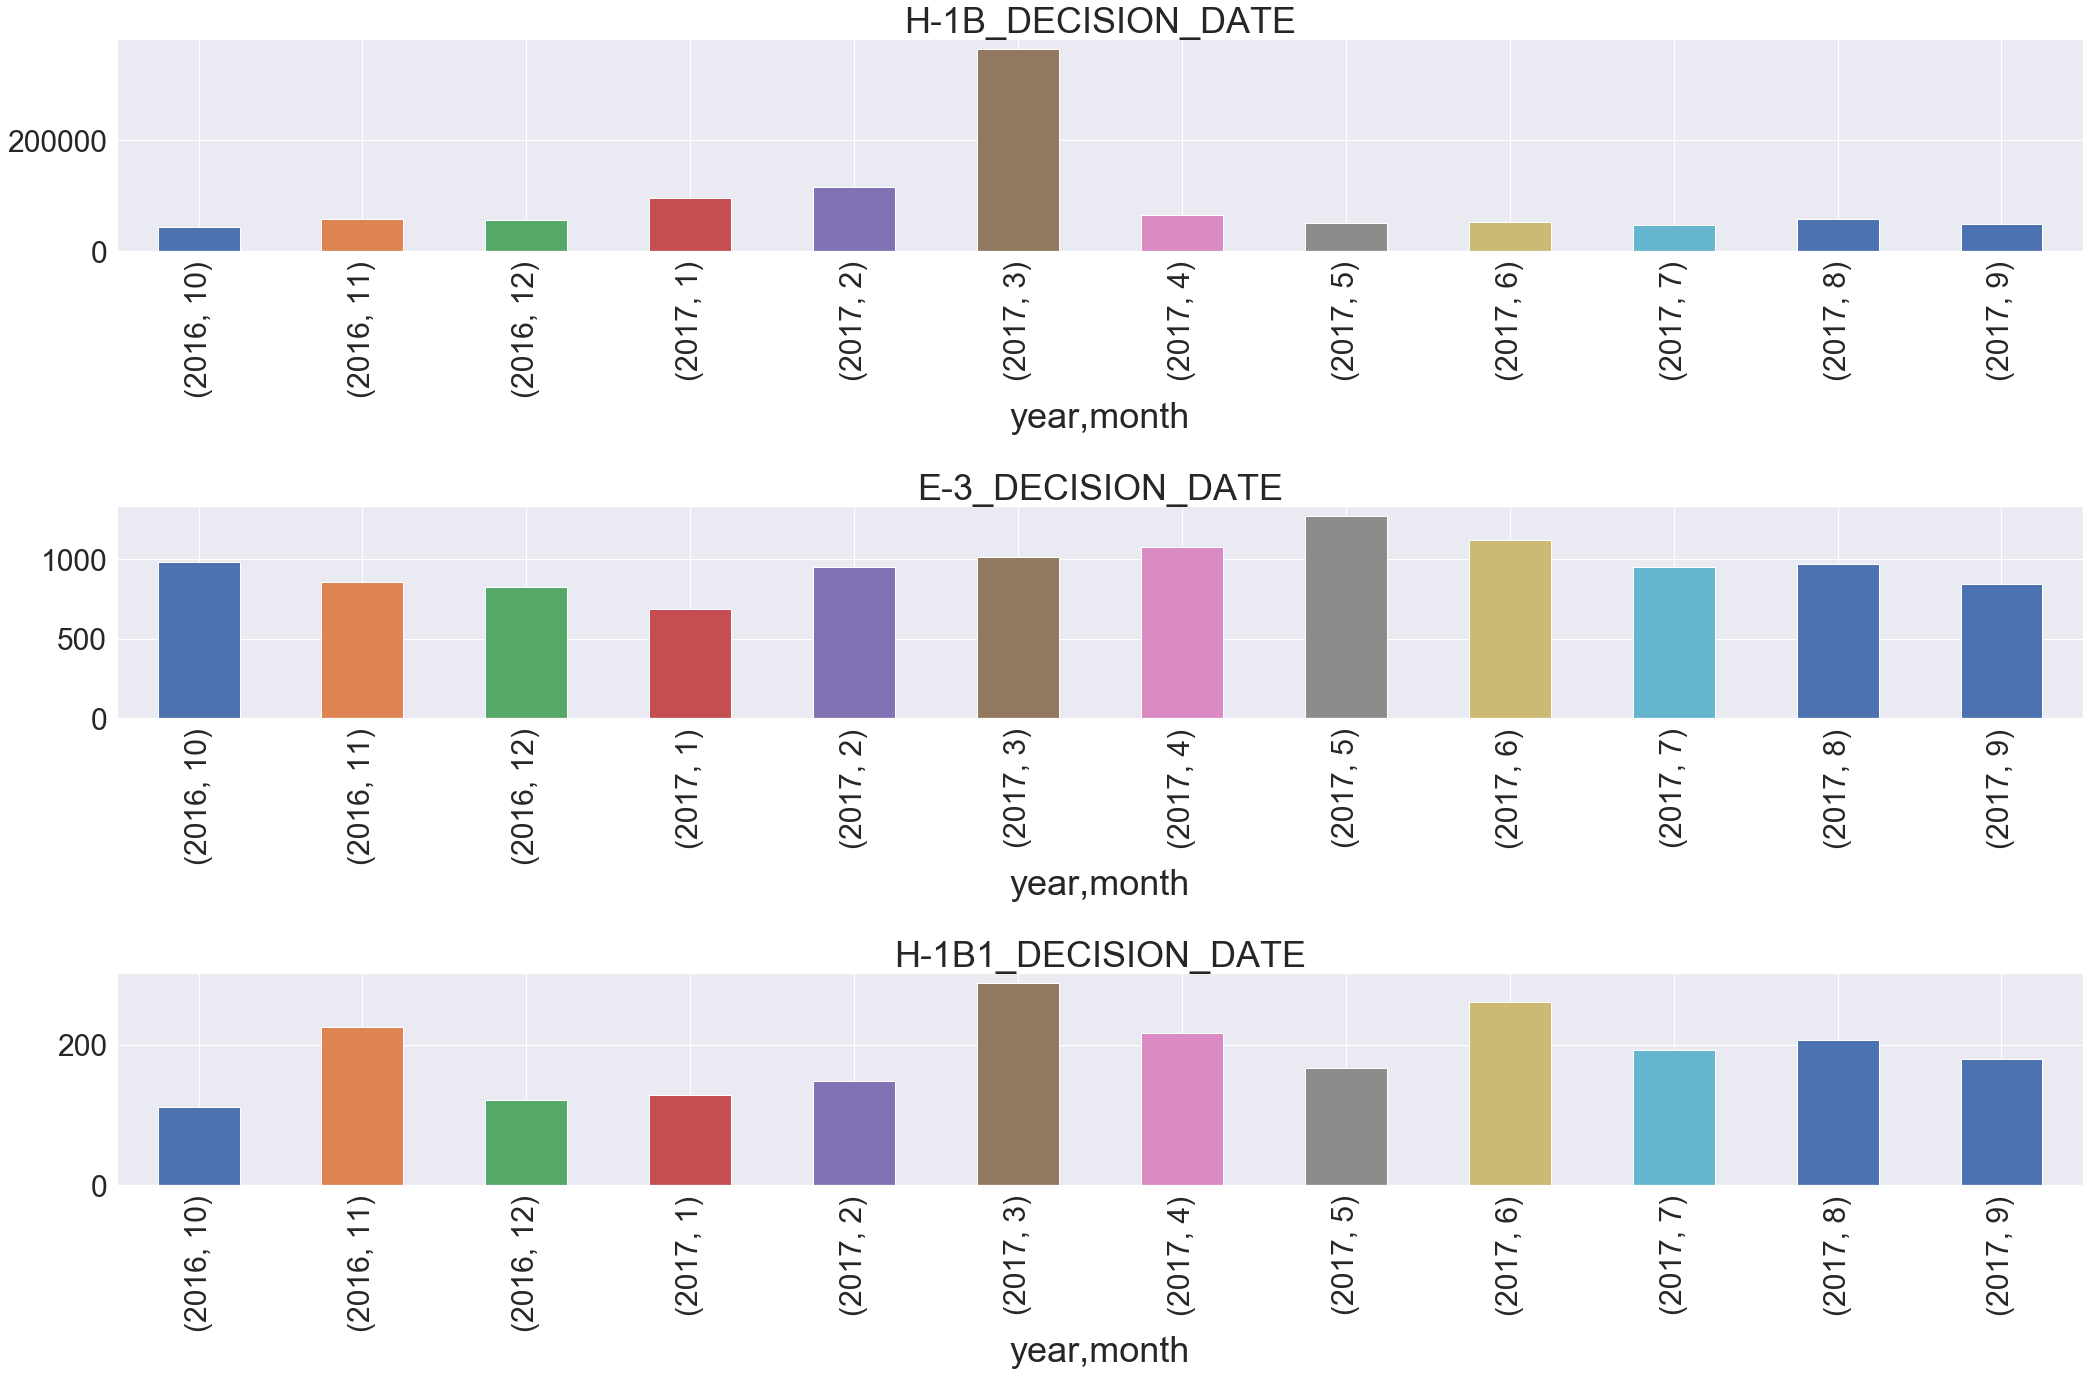

**************************************************** CASE_SUBMITTED ****************************************************


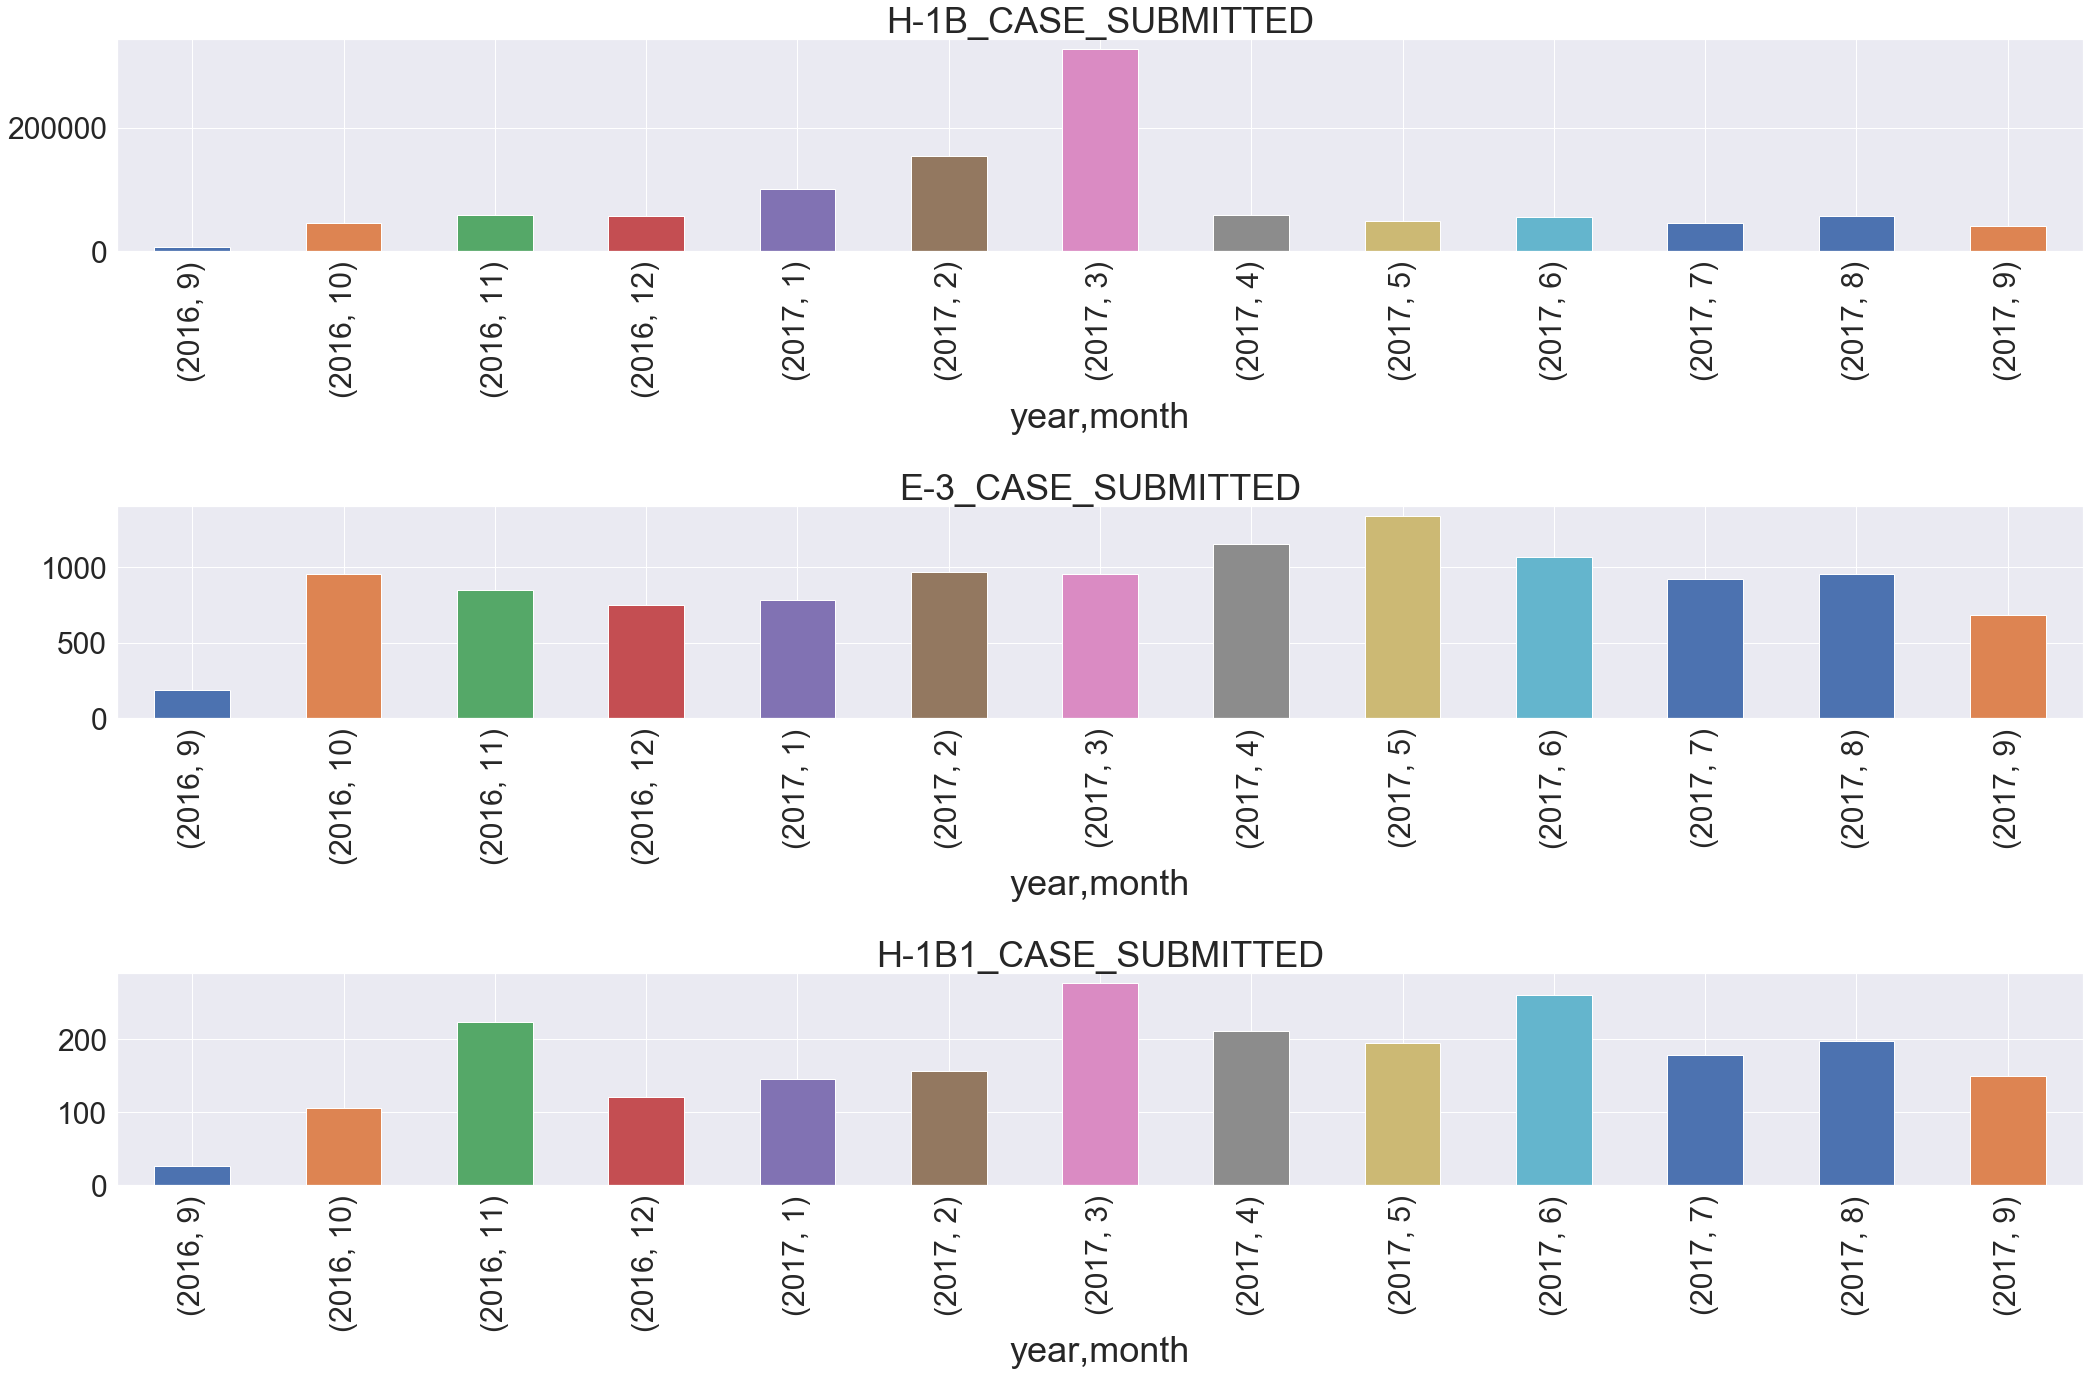

************************************************ EMPLOYMENT_START_DATE *************************************************


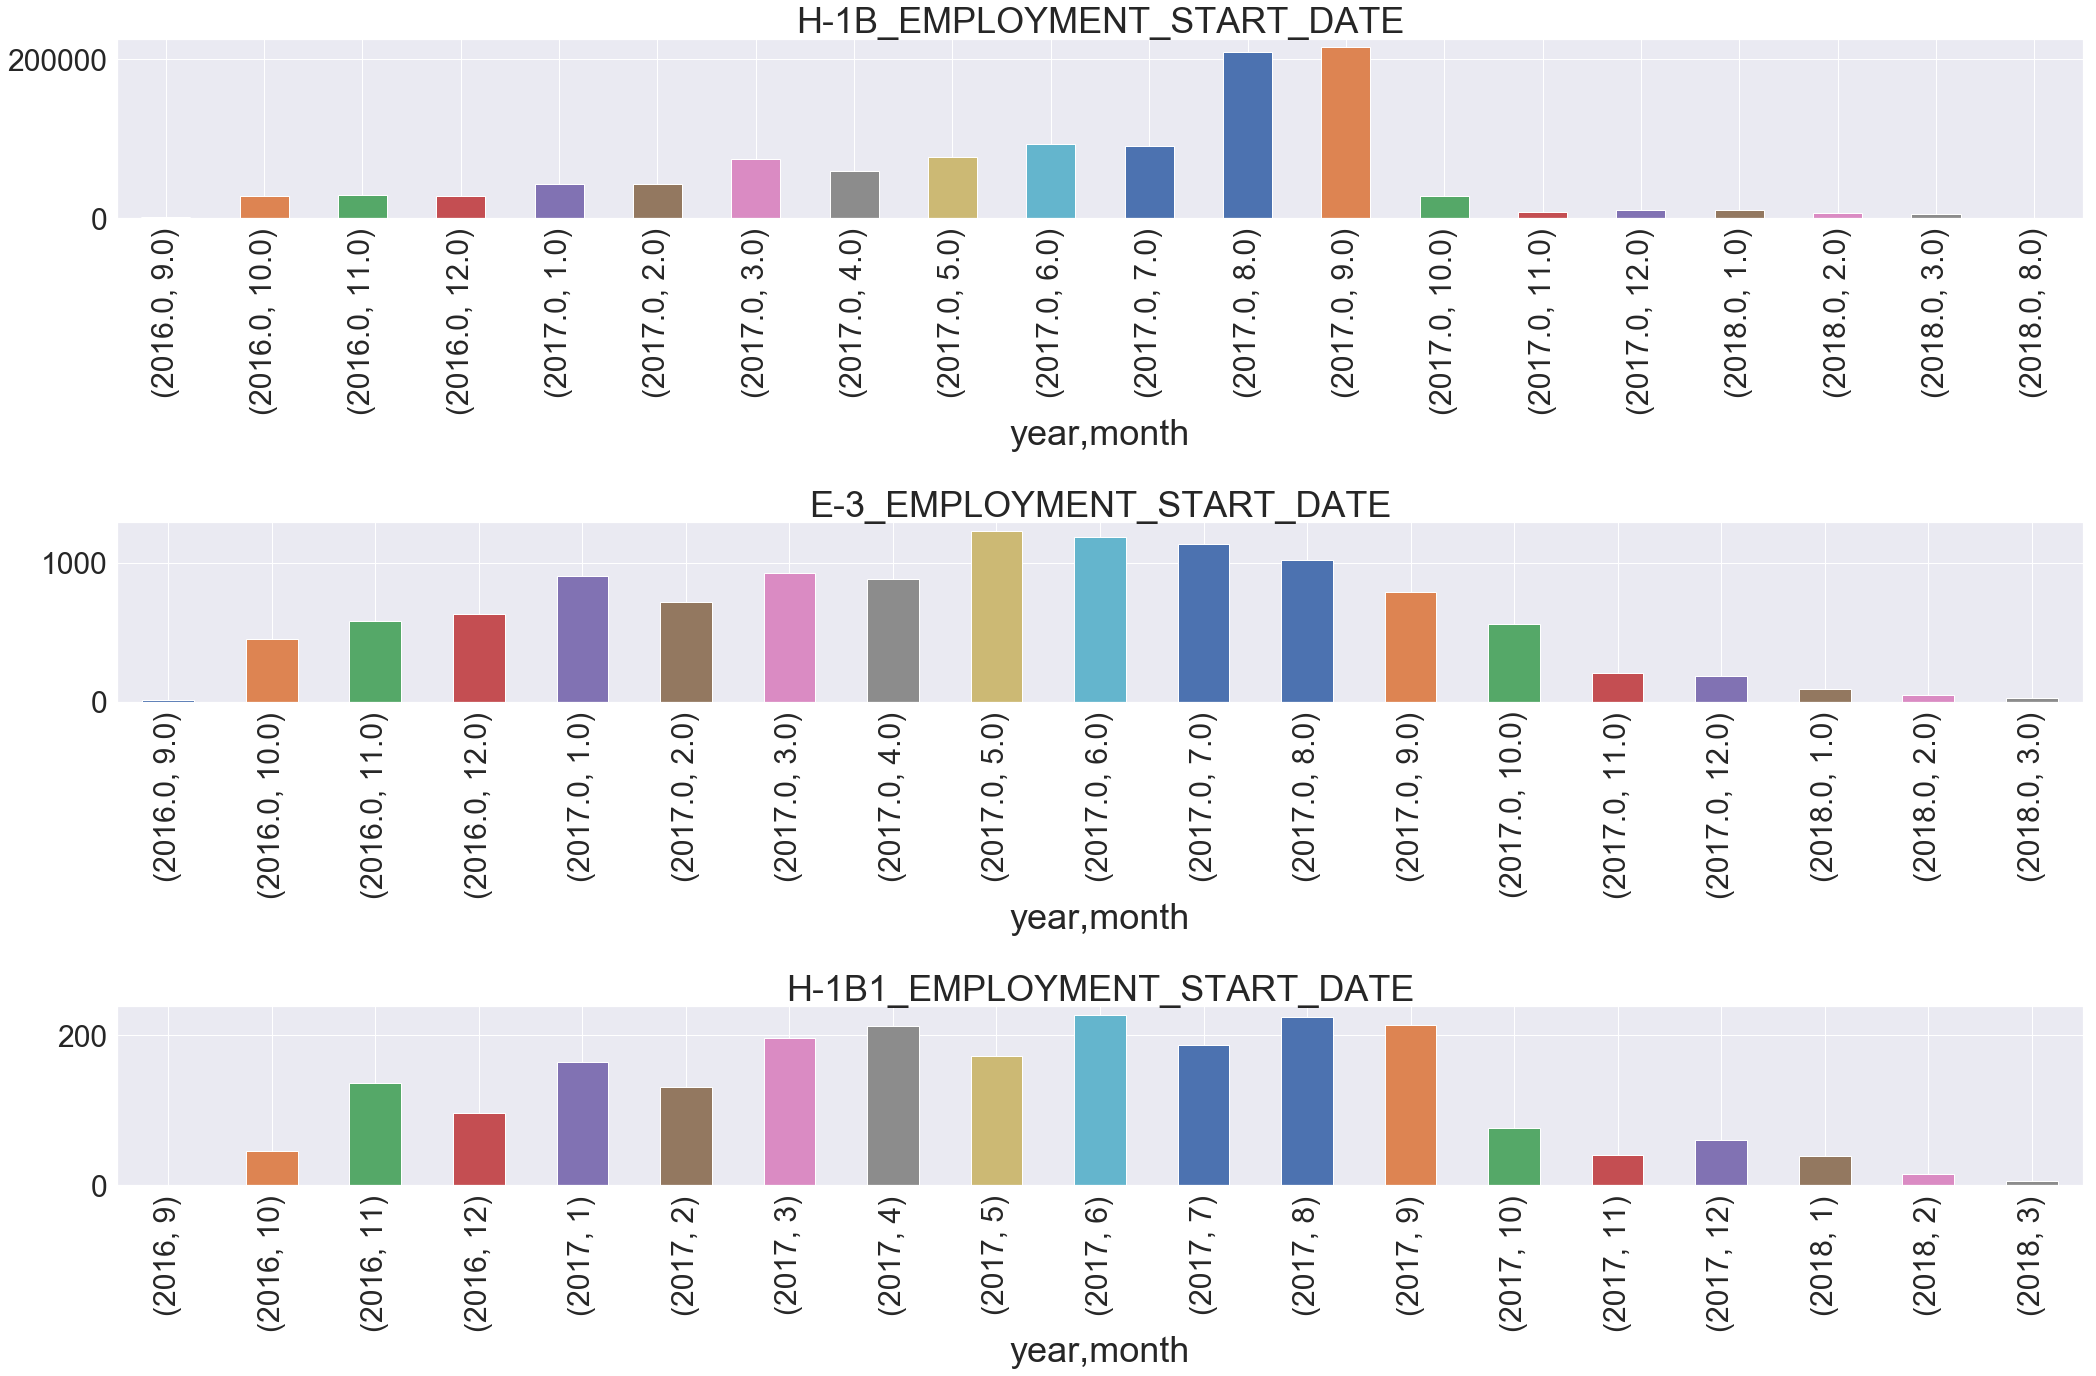

In [20]:
sns.set(font_scale=3)

date_to_show_list = ['DECISION_DATE', 'CASE_SUBMITTED', 'EMPLOYMENT_START_DATE']

visa_type_list = ['H-1B', 'E-3', 'H-1B1']
for date_index, date_to_show in enumerate(date_to_show_list):
    print(' {} '.format(date_to_show).center(120,'*'))
    fig, axes = plt.subplots(3, 1, figsize=(30,20))
    for visa_type_index, visa_type in enumerate(visa_type_list):
        construct_time_based_histogram(df_2017_certified, visa_type, date_to_show, axis=axes[visa_type_index])
    plt.tight_layout()
    plt.show()

It can be observed that both the 'DECISION_DATE' and 'CASE_SUBMITTED' histograms for H-1B have spikes in March, which is possibly because the filing season starts on April 1st. As the caps of H-1B usually get filled very quickly, most applications are submitted in the beginning of the filing season. The histograms for the other two visa types, namely, E-3 and H-1B1, are more evenly distributed, because they have a separate alloted quota and are usually not used up.

For 'EMPLOYMENT_START_DATE', there is again a spike in September for H-1B, but more evenly distributed for the other two visas. This is again likely beause H-1B applicants may not start working until October 1st, and may not enter the US more than 10 days before the start date, while there isn't such a limitation for H-1B1 and E-3 applicants.

### Which company applied for the most working visas?

This indiciates these companies either welcome foreigners more or they are big companies. We can therefore normalize these numbers with the number of jobs in the company to get an index of how welcoming these companies are to foreigners!

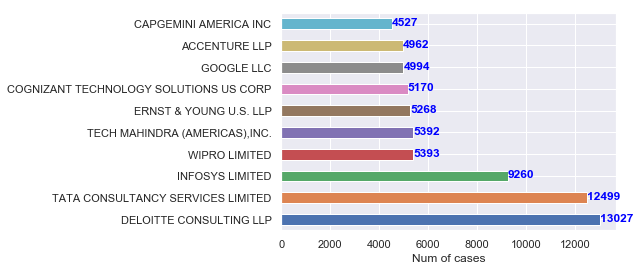

In [21]:
plot_horizontal_bar_char(df_2018_certified['EMPLOYER_NAME'].value_counts()[:10], 1, 'Num of cases', hor_shift=1)

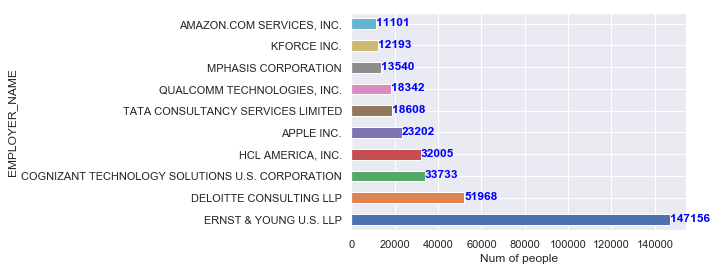

In [22]:
plot_horizontal_bar_char(df_2018_certified.groupby(by=['EMPLOYER_NAME'])['TOTAL_WORKERS'].sum().sort_values(ascending=False)[:10],
                         1, 'Num of people', hor_shift=1)

Does the huge difference between number of cases and number of people make sense? Let's look at the column 'TOTAL_WORKERS'! It seems like this value can go up to 200. So the difference seems reasonable.

In [23]:
df_2018_certified['TOTAL_WORKERS'].describe()

count    486015.000000
mean          2.099310
std           5.997411
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         200.000000
Name: TOTAL_WORKERS, dtype: float64

From Vault.com, we can know the approximate number of employees:

For Ernst & Young US. LLP, there are ~43,500 employees in the US.
http://vault.com/company-profiles/accounting/ey-llp/company-overview.aspx
https://www.statista.com/statistics/189247/number-of-employees-of-ernst-young-by-area/ --> ~71,489 in Americas

For Deloitte Consulting LLP, there are ~45,000 employees.
http://vault.com/company-profiles/management-strategy/deloitte-consulting-llp/company-overview.aspx

For Cognizant Technology Solutions, there are ~217,700 employees
http://vault.com/company-profiles/tech-consulting/cognizant/company-overview.aspx

In [24]:
df_2018_certified.loc[df_2018_certified['EMPLOYER_NAME']=='ERNST & YOUNG U.S. LLP', 'NEW_EMPLOYMENT'].sum()

57055

### Playground

In [25]:
df_2018['CASE_STATUS'].value_counts()

CERTIFIED              486015
CERTIFIED-WITHDRAWN     31061
WITHDRAWN               17320
DENIED                   7159
Name: CASE_STATUS, dtype: int64

In [26]:
# What are the VISA Classes 

In [27]:
df_2018['EMPLOYER_CITY'].unique()

array(['CAMBRIDGE', 'BEVERLY HILLS', 'DURHAM', ..., 'POSEN', 'FERRUM',
       'SAFFORD'], dtype=object)

In [28]:
df_2018['EMPLOYER_CITY'].value_counts()

NEW YORK            27149
CHICAGO             19188
PHILADELPHIA        17777
PLANO               13753
ROCKVILLE           13554
SAN FRANCISCO       10990
EDISON              10214
SAN JOSE             9191
MOUNTAIN VIEW        8499
COLLEGE STATION      8254
HOUSTON              8148
SOUTH PLAINFIELD     8125
SEATTLE              8069
IRVING               7866
SANTA CLARA          7767
TROY                 7570
DURHAM               7007
DALLAS               6832
BOSTON               6755
SUNNYVALE            5737
EAST BRUNSWICK       5723
SECAUCUS             5676
PISCATAWAY           5194
REDMOND              4954
TAMPA                4894
                    ...  
TWENTYNINE PALMS        1
BRECKVILLE              1
CANNON FALLS            1
NOTINGHAM               1
CENTERPORT              1
TUXEDO PARK             1
MORTON                  1
JENSEN BEACH            1
FLOOR 18                1
WINTR HAVEN             1
BYRON CENTER            1
HALTOM CITY             1
INGLIS      

In [29]:
df_2018[df_2018['EMPLOYER_CITY']=='MANHATTAN']

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_ADDRESS,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,EMPLOYER_COUNTRY,EMPLOYER_PROVINCE,EMPLOYER_PHONE,EMPLOYER_PHONE_EXT,AGENT_REPRESENTING_EMPLOYER,AGENT_ATTORNEY_NAME,AGENT_ATTORNEY_CITY,AGENT_ATTORNEY_STATE,JOB_TITLE,SOC_CODE,SOC_NAME,NAICS_CODE,TOTAL_WORKERS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMP,CHANGE_EMPLOYER,AMENDED_PETITION,FULL_TIME_POSITION,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_WAGE_LEVEL,PW_SOURCE,PW_SOURCE_YEAR,PW_SOURCE_OTHER,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,PUBLIC_DISCLOSURE_LOCATION,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,ORIGINAL_CERT_DATE
2273,I-200-17270-284976,CERTIFIED,2017-09-27,2017-10-03,H-1B,2017-12-17,2020-12-16,KANSAS STATE UNIVERSITY,NaN,104 INTERNATIONAL STUDENT CENTER,MANHATTAN,KS,66506,UNITED STATES OF AMERICA,NaN,7855326449,NaN,N,",",NaN,NaN,FELLOW POST DOC,19-1013,SOIL AND PLANT SCIENTISTS,611310.0,1,1,0,0,0,0,0,Y,39957.0,Year,Level I,OES,2017.0,NaN,54080.0,0.0,Year,N,N,NaN,NaN,NaN,MANHATTAN,RILEY,KS,66506,NaT
7742,I-200-16112-259964,CERTIFIED-WITHDRAWN,2016-04-21,2017-10-10,H-1B,2016-05-31,2019-05-30,KANSAS STATE UNIVERSITY,NaN,104 INTERNATIONAL STUDENT CENTER,MANHATTAN,KS,66506,UNITED STATES OF AMERICA,NaN,7855326449,NaN,N,",",NaN,NaN,RESEARCH ASSOCIATE,19-2012,PHYSICISTS,611310.0,1,1,0,0,0,0,0,Y,46259.0,Year,Level I,OES,2015.0,OFLC ONLINE DATA CENTER,46259.0,0.0,Year,N,N,NaN,NaN,NaN,MANHATTAN,RILEY,KS,66506,2016-04-27
9304,I-200-17277-319153,CERTIFIED,2017-10-04,2017-10-11,H-1B,2017-11-06,2020-11-05,KANSAS STATE UNIVERSITY,NaN,104 INTERNATIONAL STUDENT CENTER,MANHATTAN,KS,66506,UNITED STATES OF AMERICA,NaN,7855326449,NaN,N,",",NaN,NaN,GRANTS & CONTRACTS ADMINISTRATOR,23-2011,PARALEGALS AND LEGAL ASSISTANTS,611310.0,1,0,0,0,0,0,1,Y,57387.0,Year,Level III,OES,2017.0,NaN,57387.0,0.0,Year,N,N,NaN,NaN,NaN,LAWRENCE,DOUGLAS,KS,66049,NaT
14699,I-200-17282-203797,CERTIFIED,2017-10-09,2017-10-13,H-1B,2017-10-23,2020-10-22,KANSAS STATE UNIVERSITY,NaN,104 INTERNATIONAL STUDENT CENTER,MANHATTAN,KS,66506,UNITED STATES OF AMERICA,NaN,7855326449,NaN,N,",",NaN,NaN,RESEARCH ASSOCIATE,19-4021,BIOLOGICAL TECHNICIANS,611310.0,1,0,0,0,0,1,0,Y,44325.0,Year,Level III,OES,2017.0,OFLC ONLINE DATA CENTER,62000.0,0.0,Year,N,N,NaN,NaN,NaN,MANHATTAN,RILEY,KS,66506,NaT
15292,I-200-17283-976536,CERTIFIED,2017-10-10,2017-10-16,H-1B,2017-11-19,2019-11-18,KANSAS STATE UNIVERSITY,NaN,104 INTERNATIONAL STUDENT CENTER,MANHATTAN,KS,66506,UNITED STATES OF AMERICA,NaN,7855326449,NaN,N,",",NaN,NaN,FELLOW POST DOC,19-1013,SOIL AND PLANT SCIENTISTS,611310.0,1,1,0,0,0,0,0,Y,40352.0,Year,Level I,OES,2017.0,OFLC ONLINE DATA CENTER,47476.0,0.0,Year,N,N,NaN,NaN,NaN,MANHATTAN,RILEY,KS,66506,NaT
17894,I-200-17284-004199,CERTIFIED,2017-10-11,2017-10-17,H-1B,2018-04-08,2021-04-07,KANSAS STATE UNIVERSITY,NaN,104 INTERNATIONAL STUDENT CENTER,MANHATTAN,KS,66506,UNITED STATES OF AMERICA,NaN,7855326449,NaN,N,",",NaN,NaN,CLINICAL ASSISTANT PROFESSOR,25-1071,"HEALTH SPECIALTIES TEACHERS, POSTSECONDARY",611310.0,1,1,0,0,0,0,0,Y,84237.0,Year,Level III,OES,2017.0,OFLC ONLINE DATA CENTER,105000.0,0.0,Year,N,N,NaN,Y,NaN,MANHATTAN,RILEY,KS,66506,NaT
17898,I-200-17284-338869,CERTIFIED,2017-10-11,2017-10-17,H-1B,2018-04-09,2021-04-08,KANSAS STATE UNIVERSITY,NaN,104 INTERNATIONAL STUDENT CENTER,MANHATTAN,KS,66506,UNITED STATES OF AMERICA,NaN,7855326449,NaN,N,",",NaN,NaN,CLINICAL ASSISTANT PROFESSOR,25-1071,"HEALTH SPECIALTIES TEACHERS, POSTSECONDARY",611310.0,1,1,0,0,0,0,0,Y,84237.0,Year,Level III,OES,2017.0,OFLC ONLINE DATA CENTER,180000.0,0.0,Year,N,N,NaN,NaN,NaN,MANHATTAN,RILEY,KS,66506,NaT
25348,I-200-16260-503527,CERTIFIED-WITHDRAWN,2016-09-16,2017-10-25,H-1B,2016-11-01,2019-10-31,KANSAS STATE UNIVERSITY,NaN,104 INTERNATIONAL STUDENT CENTER,MANHATTAN,K

In [30]:
df_2018['VISA_CLASS'].value_counts()

H-1B               530296
E-3 Australian       9550
H-1B1 Singapore       973
H-1B1 Chile           736
Name: VISA_CLASS, dtype: int64

In [31]:
df_2018 = df_2018[df_2018['CASE_STATUS']=='CERTIFIED']

In [32]:
df_2018['EMPLOYER_NAME'].value_counts()

DELOITTE CONSULTING LLP                            13027
TATA CONSULTANCY SERVICES LIMITED                  12499
INFOSYS LIMITED                                     9260
WIPRO LIMITED                                       5393
TECH MAHINDRA (AMERICAS),INC.                       5392
ERNST & YOUNG U.S. LLP                              5268
COGNIZANT TECHNOLOGY SOLUTIONS US CORP              5170
GOOGLE LLC                                          4994
ACCENTURE LLP                                       4962
CAPGEMINI AMERICA INC                               4527
MICROSOFT CORPORATION                               4274
IBM CORPORATION                                     3863
AMAZON.COM SERVICES, INC.                           3047
SYNTEL INC                                          2589
LARSEN & TOUBRO INFOTECH LIMITED                    2471
FACEBOOK, INC.                                      1957
HCL AMERICA, INC.                                   1948
COGNIZANT TECHNOLOGY SOLUTIONS 

In [33]:
df_2018['DECISION_DATE']

13       2017-10-02
108      2017-10-02
127      2017-10-02
152      2017-10-02
157      2017-10-02
160      2017-10-02
194      2017-10-02
196      2017-10-02
199      2017-10-02
202      2017-10-02
203      2017-10-02
205      2017-10-02
206      2017-10-02
207      2017-10-02
208      2017-10-02
209      2017-10-02
210      2017-10-02
211      2017-10-02
212      2017-10-02
213      2017-10-02
215      2017-10-02
217      2017-10-02
218      2017-10-02
219      2017-10-02
221      2017-10-02
            ...    
541514   2018-06-29
541515   2018-06-29
541516   2018-06-29
541517   2018-06-29
541518   2018-06-29
541519   2018-06-29
541520   2018-06-29
541521   2018-06-29
541522   2018-06-29
541523   2018-06-29
541524   2018-06-29
541525   2018-06-29
541526   2018-06-29
541527   2018-06-29
541528   2018-06-29
541529   2018-06-29
541530   2018-06-29
541531   2018-06-29
541532   2018-06-29
541533   2018-06-29
541534   2018-06-29
541535   2018-06-29
541536   2018-06-29
541553   2018-02-22


In [34]:
df_2018['EMPLOYMENT_START_DATE']

13       2017-10-10
108      2017-10-15
127      2017-11-06
152      2017-10-15
157      2018-03-22
160      2017-09-29
194      2017-10-01
196      2018-03-23
199      2017-12-01
202      2017-12-24
203      2017-11-15
205      2018-01-16
206      2017-09-26
207      2017-10-09
208      2018-03-28
209      2017-12-24
210      2018-01-23
211      2017-09-29
212      2018-02-06
213      2017-12-02
215      2017-10-02
217      2017-09-26
218      2017-09-26
219      2018-02-28
221      2017-10-23
            ...    
541514   2018-07-01
541515   2018-06-25
541516   2018-10-29
541517   2018-07-24
541518   2018-06-25
541519   2018-06-25
541520   2018-07-02
541521   2018-09-05
541522   2018-10-02
541523   2018-07-03
541524   2018-07-03
541525   2018-07-03
541526   2018-07-03
541527   2018-07-03
541528   2018-07-03
541529   2018-07-02
541530   2018-06-25
541531   2018-07-02
541532   2018-07-09
541533   2018-12-07
541534   2018-07-02
541535   2018-09-09
541536   2018-07-09
541553   2018-05-26


In [35]:
construct_time_based_histogram((df_2018.loc[df_2018['VISA_CLASS']=='H-1B1 Singapore', 'EMPLOYMENT_START_DATE']),'H-1B1')

TypeError: construct_time_based_histogram() missing 2 required positional arguments: 'date_to_show' and 'axis'

In [ ]:
df["date"].dt.month

In [ ]:
series

In [ ]:
pd.to_datetime(df_2018.loc[df_2018['VISA_CLASS']=='H-1B1 Singapore', 'EMPLOYMENT_START_DATE'])

In [ ]:
pd.__version__

In [ ]:
df_2018.loc[df_2018['VISA_CLASS']=='H-1B1 Singapore', 'EMPLOYMENT_START_DATE']

In [ ]:
df_2018.loc[0, 'EMPLOYMENT_START_DATE']

In [ ]:
len(df_2018[(df_2018['EMPLOYER_NAME']=='BLOOMBERG LP')])

In [ ]:
len(df_2018[(df_2018['EMPLOYER_NAME']=='BLOOMBERG LP') 
       & (df_2018['VISA_CLASS']=='H-1B')])

In [ ]:
df_2018.columns

In [ ]:
df_2018

In [ ]:
df_2018['PREVAILING_WAGE']

In [ ]:
df_2018[df_2018['VISA_CLASS'].str.startswith('H-1B1')]

In [ ]:
df_2018.loc[df_2018['EMPLOYER_NAME'].str.startswith('BLOOM')]

In [ ]:
pd.to_datetime(df_2018.loc[df_2018['VISA_CLASS']=='H-1B1 Singapore', 'EMPLOYMENT_START_DATE']).iloc[0]

In [ ]:
print(pd.version.version)

In [ ]:
construct_time_based_histogram(pd.to_datetime(df_2018.loc[df_2018['VISA_CLASS']=='H-1B1 Singapore', 'EMPLOYMENT_START_DATE']))

In [ ]:
df_2018.loc[df_2018['VISA_CLASS']=='H-1B1 Singapore', 'EMPLOYMENT_START_DATE'].values

In [ ]:
df_2018['EMPLOYMENT_START_DATE'] - df_2018['CASE_SUBMITTED']

In [ ]:
df_2018.loc[df_2018['SOC_NAME'].str.contains('INTERN', na=False),
            'SOC_NAME'].value_counts()

df_2018.loc[(df_2018['JOB_TITLE'].str.contains('INTERN ', na=False)) &
            (df_2018['VISA_CLASS'].str.contains("H-1B1", na=False))
           ]

df_2018[df_2018['JOB_TITLE']=='ENGINEER INTERN (ELECTRICAL)']

df_2018.loc[df_2018['JOB_TITLE'].str.contains('INTERN ', na=False),'JOB_TITLE'].value_counts()